# Flight Price Prediction

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Downloading Data

You can download training and testing data from https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh?select=Test_set.xlsx

# Exploratory Data Analysis

In [72]:
##Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [73]:
train_data=pd.read_excel(r'Data_Train.xlsx')
test_data=pd.read_excel('Test_set.xlsx')

In [74]:
train_data.shape

(10683, 11)

In [75]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [76]:
train_data.isnull().sum() #checking missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [77]:
#As missing values are less we can drop them
train_data.dropna(inplace=True)

In [78]:
train_data.isnull().sum() #missing values removed

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [80]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [81]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

### As we can see, only the price column is integer, rest all the columns are object type.We need to convert the object types to integer data type to feed the data to machine learning model.
Initially taking Date_of_Journey column.We can see that it is an object type.We need to convert object datatype to timestamp.To do this we need to use 'to_datetime' function from pandas library.This converts object datatype to date time.

dt.day extracts only day from date.
dt.month extracts month from date.

In [82]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [83]:
#As we have converted date of journey column to integers we can drop the column.

train_data=train_data.drop(['Date_of_Journey'],axis=1)

In [84]:
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour #Extracting Hours
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute #Extracting Hours

train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [85]:
train_data['Total_Stops']=train_data['Total_Stops'].replace('non-stop','0 stop') #replacing non-stop with '0 stop'

In [86]:
train_data['stops']=train_data['Total_Stops'].str.split(" ").str[0]  #extracting integer out of totalstops and make it a new column

In [87]:
train_data=train_data.drop(['Total_Stops'],axis=1) #dropping total stops column

In [88]:

train_data['stops']=train_data['stops'].astype(int) #converting to integer

In [89]:
train_data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,No info,3897,24,3,22,20,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,No info,7662,1,5,5,50,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,No info,13882,9,6,9,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,No info,6218,12,5,18,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,No info,13302,1,3,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,No info,4107,9,4,19,55,0
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,No info,4145,27,4,20,45,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,No info,7229,27,4,8,20,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,No info,12648,1,3,11,30,0


In [90]:
train_data['Arrival_hour']=pd.to_datetime(train_data.Arrival_Time).dt.hour #extracting arrival hour from arrival time
train_data['Arrival_minute']=pd.to_datetime(train_data.Arrival_Time).dt.minute #extracting arrival minute from arrival time

In [91]:
train_data.drop(['Arrival_Time'],axis=1,inplace=True) #dropping arrival time column

In [92]:
train_data

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,stops,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,22,20,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,5,50,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,9,25,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,18,5,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,16,50,1,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,No info,4107,9,4,19,55,0,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,No info,4145,27,4,20,45,0,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,No info,7229,27,4,8,20,0,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,No info,12648,1,3,11,30,0,14,10


In [93]:
duration=list(train_data['Duration'])

In [94]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:                    #check if duration contains only hours and minutes
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'       #add 'om' at the end of observation if not present
        else:
             duration[i]='0h '+  duration[i]
                
duration_hours=[]
duration_minute=[]
for i in range(len(duration)):
     duration_hours.append(int(duration[i].split(sep='h')[0]))
     duration_minute.append(int(duration[i].split(sep='m')[0].split()[-1]))  

In [95]:
train_data['Duration_hours']=duration_hours      #appending hours to new variable"Duration_hours"
train_data['Duration_min']=duration_minute       #appending hours to new variable"Duration_minute"

In [96]:
train_data.drop(['Duration'],axis=1,inplace=True)   #dropping Duration column

In [97]:
train_data

,Airline,Source,Destination,Route,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,stops,Arrival_hour,Arrival_minute,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,22,20,0,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,5,50,2,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,9,25,2,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,18,5,1,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,16,50,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info,4107,9,4,19,55,0,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,No info,4145,27,4,20,45,0,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info,7229,27,4,8,20,0,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info,12648,1,3,11,30,0,14,10,2,40


# Handling Categorical data

One can find many ways to handle data.Two of them are listed below,

1.Nominal Data --->data not in order ---> One hot encoder is used in this case.

2.Ordinal data ---->data in order ----->  Label Encoder is used in this case.

In [98]:
train_data['Airline'].value_counts()  #checking count of airlines

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

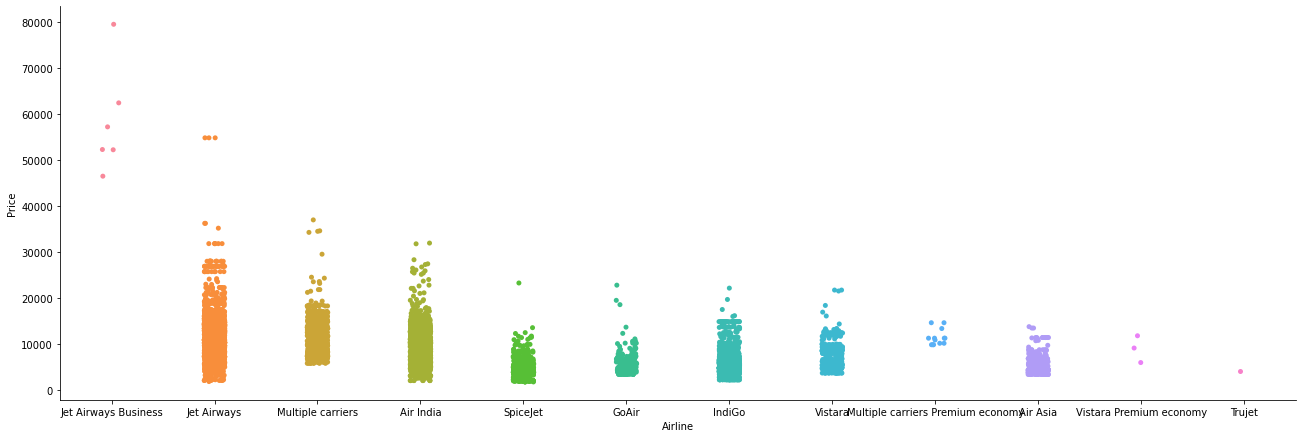

In [99]:
sns.catplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False),height=6,aspect=3)
plt.show()                   #we can see that jet airways business class is more costly

In [100]:
#Performing one hot encoding

Airline=train_data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()
train_data.drop(['Airline'],axis=1,inplace=True)

In [101]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

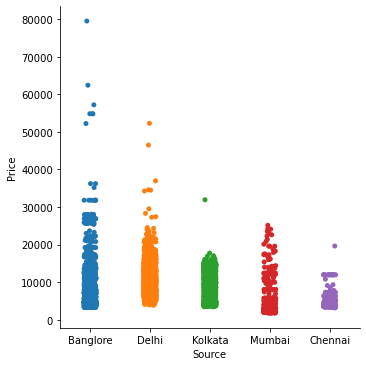

In [102]:
sns.catplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

In [103]:
Source=train_data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()
train_data.drop(['Source'],axis=1,inplace=True)

In [104]:
train_data

,Destination,Route,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,stops,Arrival_hour,Arrival_minute,Duration_hours,Duration_min
0,New Delhi,BLR → DEL,No info,3897,24,3,22,20,0,1,10,2,50
1,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,5,50,2,13,15,7,25
2,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,9,25,2,4,25,19,0
3,Banglore,CCU → NAG → BLR,No info,6218,12,5,18,5,1,23,30,5,25
4,New Delhi,BLR → NAG → DEL,No info,13302,1,3,16,50,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Banglore,CCU → BLR,No info,4107,9,4,19,55,0,22,25,2,30
10679,Banglore,CCU → BLR,No info,4145,27,4,20,45,0,23,20,2,35
10680,Delhi,BLR → DEL,No info,7229,27,4,8,20,0,11,20,3,0
10681,New Delhi,BLR → DEL,No info,12648,1,3,11,30,0,14,10,2,40


In [105]:
Destination=train_data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination
train_data.drop(['Destination'],axis=1,inplace=True)

The column Route and total_stops are related to each other
The column Additional_Info contains more than 80% of No info  as shown below.

We can drop both the columns.


In [106]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [107]:
train_data.drop(['Additional_Info','Route'],axis=1,inplace =True) #Dropping alla the categorical variables

In [108]:
data_train=pd.concat([train_data,Destination,Source,Airline],axis=1) #concatenating to new dataframe

In [109]:
data_train

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,stops,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,3897,24,3,22,20,0,1,10,2,50,...,0,1,0,0,0,0,0,0,0,0
1,7662,1,5,5,50,2,13,15,7,25,...,0,0,0,0,0,0,0,0,0,0
2,13882,9,6,9,25,2,4,25,19,0,...,0,0,1,0,0,0,0,0,0,0
3,6218,12,5,18,5,1,23,30,5,25,...,0,1,0,0,0,0,0,0,0,0
4,13302,1,3,16,50,1,21,35,4,45,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,19,55,0,22,25,2,30,...,0,0,0,0,0,0,0,0,0,0
10679,4145,27,4,20,45,0,23,20,2,35,...,0,0,0,0,0,0,0,0,0,0
10680,7229,27,4,8,20,0,11,20,3,0,...,0,0,1,0,0,0,0,0,0,0
10681,12648,1,3,11,30,0,14,10,2,40,...,0,0,0,0,0,0,0,0,1,0


# Performing the same preprocessing steps for Test Data

In [110]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [111]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [112]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# Feature selection

In [113]:
data_train.columns

Index(['Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'stops',
       'Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_min',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [114]:
X=data_train.loc[:,['Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'stops',
       'Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_min',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy']]

In [115]:
X.head()

,Journey_day,Journey_month,Dep_hour,Dep_min,stops,Arrival_hour,Arrival_minute,Duration_hours,Duration_min,Destination_Cochin,...,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,24,3,22,20,0,1,10,2,50,0,...,0,0,1,0,0,0,0,0,0,0
1,1,5,5,50,2,13,15,7,25,0,...,1,0,0,0,0,0,0,0,0,0
2,9,6,9,25,2,4,25,19,0,1,...,0,0,0,1,0,0,0,0,0,0
3,12,5,18,5,1,23,30,5,25,0,...,0,0,1,0,0,0,0,0,0,0
4,1,3,16,50,1,21,35,4,45,0,...,0,0,1,0,0,0,0,0,0,0


In [116]:
y=data_train.iloc[:,0]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

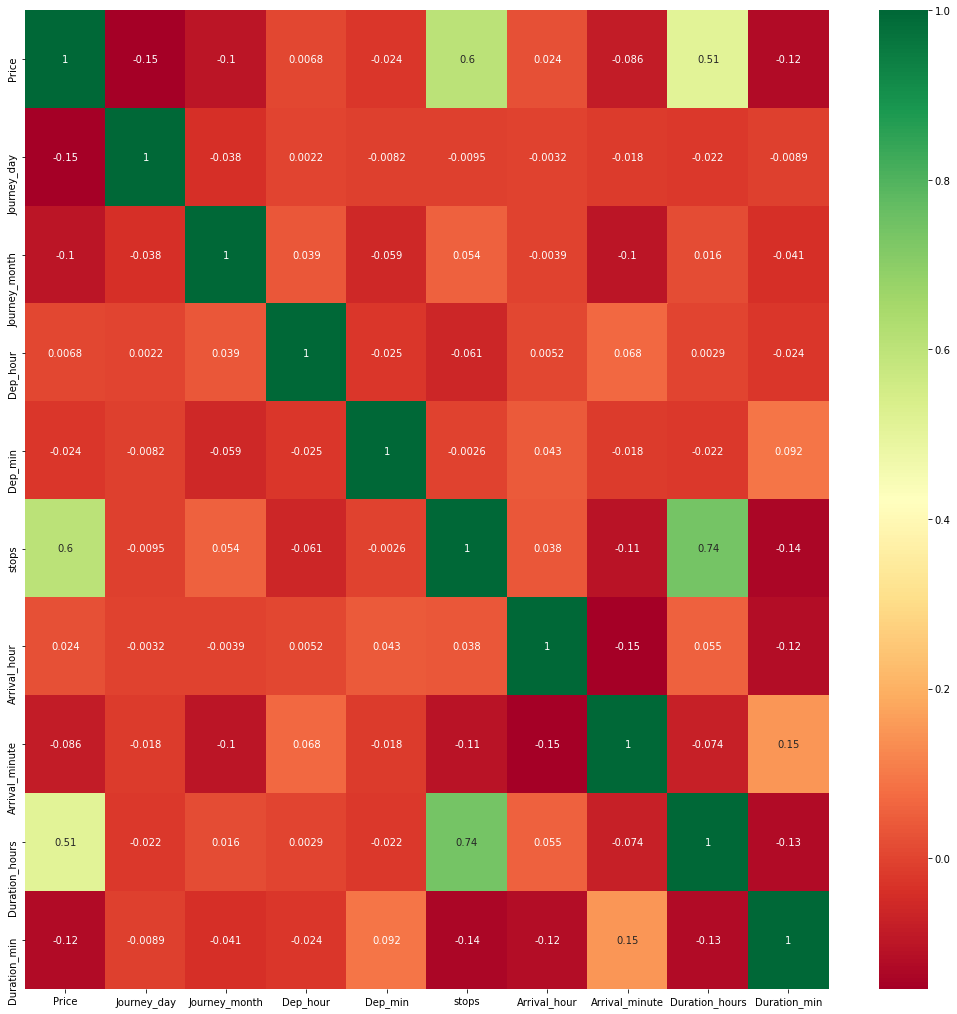

In [117]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [118]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [119]:
print(selection.feature_importances_)

[1.42442613e-01 5.47693461e-02 2.42194253e-02 2.14201805e-02
 2.39419870e-01 2.83283115e-02 1.89987686e-02 1.19338574e-01
 1.75817395e-02 9.77282296e-03 1.34090520e-02 5.68036352e-03
 5.46562933e-04 2.50469287e-02 4.61086785e-04 8.33954833e-03
 3.19246768e-03 6.99746243e-03 8.68350975e-03 1.71231788e-03
 1.89836791e-02 1.34128396e-01 6.70939253e-02 2.01333288e-02
 9.12920330e-04 3.40551606e-03 4.90538541e-03 7.58986420e-05]


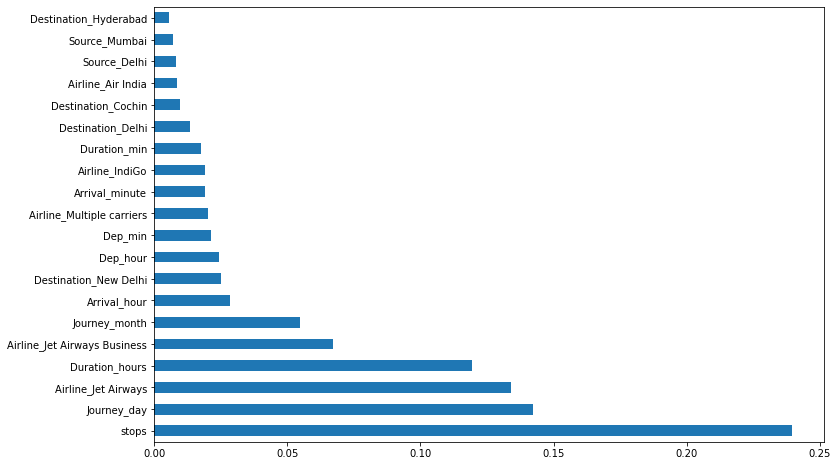

In [120]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

1.Split dataset into train and test set in order to prediction w.r.t X_test

2.If needed do scaling of data

3.Scaling is not done in Random forest

4.Import model

5.Fit the data

6.Predict w.r.t X_test

7.In regression check RSME Score

8.Plot graph

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

In [123]:
!pip install xgboost

You should consider upgrading via the 'c:\users\lenpc\anaconda3\python.exe -m pip install --upgrade pip' command.


In [124]:
from xgboost import XGBRegressor

In [125]:
xgb = XGBRegressor()

In [126]:
 param_grid_xgb = {'learning_rate': [0.04],'max_depth': [15],'n_estimators': [155]}

In [127]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
selection = GridSearchCV(xgb, cv=3, param_grid=param_grid_xgb,scoring='neg_mean_absolute_error')

In [131]:
 selection.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', vali

In [132]:
best_model = XGBRegressor(learning_rate=selection.best_params_['learning_rate'],max_depth=selection.best_params_['max_depth'],n_estimators=selection.best_params_['n_estimators'])

In [134]:
from sklearn import metrics

In [136]:
best_model.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, best_model.predict(X_test))

In [138]:
r2 = metrics.r2_score(y_test, best_model.predict(X_test))

In [139]:
mae

1220.3010245909131

In [140]:
r2

0.7723883027230303

In [143]:
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [144]:
RMSE

2182.672915482792

In [145]:
y_prediction = best_model.predict(X_test)

In [146]:
metrics.r2_score(y_test, y_prediction)

0.7723883027230303

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

In [51]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
y_pred = reg_rf.predict(X_test)

In [53]:
reg_rf.score(X_train, y_train)


0.9570588138349734

In [54]:
reg_rf.score(X_test, y_test)

0.7701679800693578

C:\Users\lenpc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


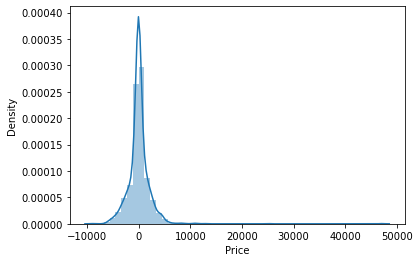

In [55]:
sns.distplot(y_test-y_pred)
plt.show()

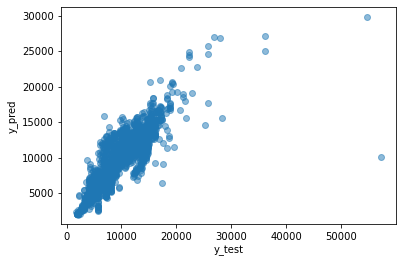

In [56]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1222.7140692927283
MSE: 4764061.055982153
RMSE: 2182.672915482792


In [58]:
# RMSE/(max(DV)-min(DV))

2208.1365/(max(y)-min(y))

0.028399373657608067

In [59]:
metrics.r2_score(y_test, y_pred)

0.7701679800693578

# Hyperparameter Tuning

*Choose following method for hyperparameter tuning

      1.RandomizedSearchCV --> Fast
  
      2.GridSearchCV
  
*Assign hyperparameters in form of dictionery

*Fit the model

*Check best paramters and best score

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [62]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

In [64]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=  22.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=  25.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=  20.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=  19.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900; total time=  19.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=  19.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=600; total time=  17.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

C:\Users\lenpc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


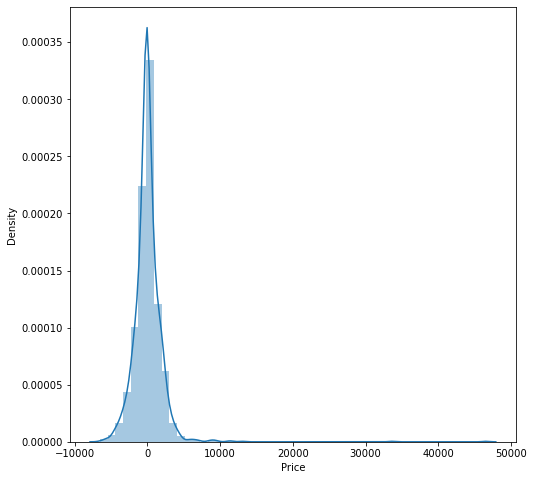

In [65]:
rf_random.best_params_
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

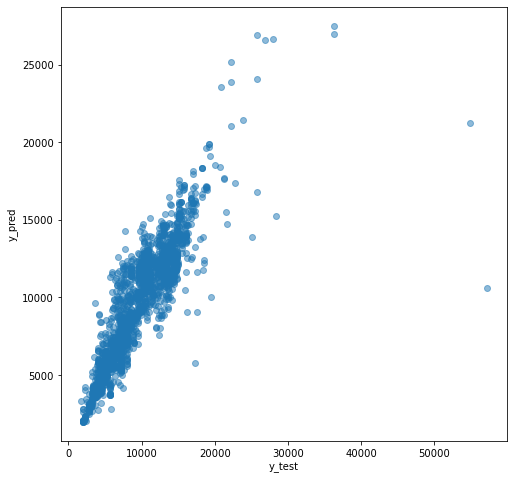

In [66]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1170.1448053900033
MSE: 4371197.9583757
RMSE: 2090.7410070058177


In [68]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [69]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [70]:
y_prediction = rf_random.predict(X_test)

In [71]:
metrics.r2_score(y_test, y_prediction)

0.7891208268566007

In [2]:
from platform import python_version

print(python_version())

3.8.8
